In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("Jakarta Stock Exchange LQ45 Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/25/2024,996.22,994.44,996.93,990.34,2.33B,-0.05%
1,03/22/2024,996.74,992.41,997.14,991.12,3.74B,0.20%
2,03/21/2024,994.77,999.38,"1,003.94",994.77,4.54B,0.19%
3,03/20/2024,992.93,989.97,995.32,988.12,7.90B,-0.42%
4,03/19/2024,997.15,997.57,"1,004.03",996.14,4.85B,0.36%


In [15]:
df = df[::-1]
df = df[['Date','Price']]
df.head()

,Date,Price
1274,01/02/2019,984.35
1273,01/03/2019,990.88
1272,01/04/2019,"1,001.64"
1271,01/07/2019,"1,002.78"
1270,01/08/2019,997.42


In [16]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [17]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [18]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

1274   2019-01-02
1273   2019-01-03
1272   2019-01-04
1271   2019-01-07
1270   2019-01-08
          ...    
4      2024-03-19
3      2024-03-20
2      2024-03-21
1      2024-03-22
0      2024-03-25
Name: Date, Length: 1275, dtype: datetime64[ns]

In [19]:
df.index = df.pop('Date')
df

,Price
Date,
2019-01-02,984.35
2019-01-03,990.88
2019-01-04,1001.64
2019-01-07,1002.78
2019-01-08,997.42
...,...
2024-03-19,997.15
2024-03-20,992.93
2024-03-21,994.77


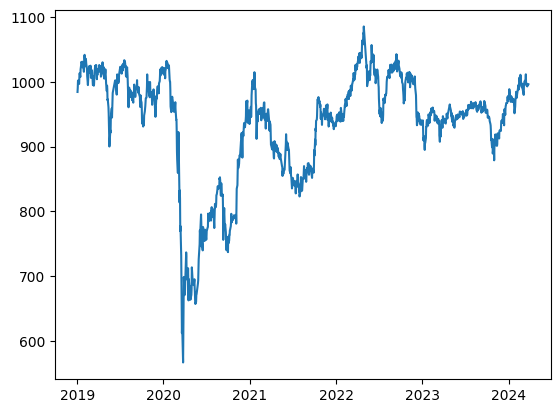

In [20]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Price'])

In [21]:
import numpy as np

def df_to_windowed_df(dataframe, n):
  first_date = df.index[n]
  last_date  = df.index[-1]

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Price'].to_numpy()
    print(values)
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)
    print(y)
    target_date += datetime.timedelta(days=1)

    if last_time:
      break
    # print(target_date)
    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Date'] = dates
  
  X = np.array(X)
  print(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

data = df_to_windowed_df(df, n=10)
# data

[ 984.35  990.88 1001.64 1002.78  997.42  996.77 1009.63 1013.32 1007.59
 1019.3  1021.6 ]
1021.6
[ 990.88 1001.64 1002.78  997.42  996.77 1009.63 1013.32 1007.59 1019.3
 1021.6  1024.91]
1024.91
[1001.64 1002.78  997.42  996.77 1009.63 1013.32 1007.59 1019.3  1021.6
 1024.91 1030.69]
1030.69
[1001.64 1002.78  997.42  996.77 1009.63 1013.32 1007.59 1019.3  1021.6
 1024.91 1030.69]
1030.69
[1001.64 1002.78  997.42  996.77 1009.63 1013.32 1007.59 1019.3  1021.6
 1024.91 1030.69]
1030.69
[1002.78  997.42  996.77 1009.63 1013.32 1007.59 1019.3  1021.6  1024.91
 1030.69 1029.06]
1029.06
[ 997.42  996.77 1009.63 1013.32 1007.59 1019.3  1021.6  1024.91 1030.69
 1029.06 1031.06]
1031.06
[ 996.77 1009.63 1013.32 1007.59 1019.3  1021.6  1024.91 1030.69 1029.06
 1031.06 1022.46]
1022.46
[1009.63 1013.32 1007.59 1019.3  1021.6  1024.91 1030.69 1029.06 1031.06
 1022.46 1023.13]
1023.13
[1013.32 1007.59 1019.3  1021.6  1024.91 1030.69 1029.06 1031.06 1022.46
 1023.13 1025.79]
1025.79
[1013.32 1007.5

In [22]:
data.to_csv('DATA.csv', index = False)

In [23]:
dates = data.pop('Date')

## LSTM

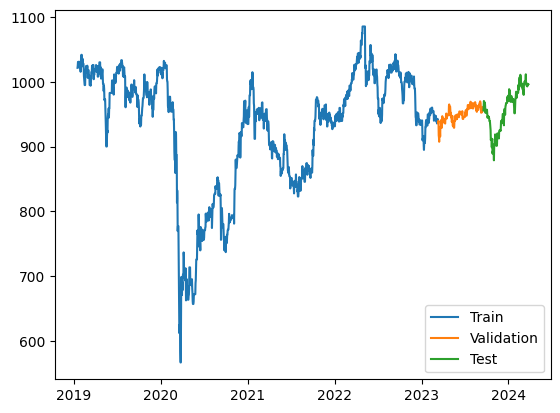

In [24]:
from sklearn.preprocessing import StandardScaler
X = data.drop(columns ='Target')
y = data['Target']

q_80 = int(len(X) * .8)
q_90 = int(len(X) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
# dates_test

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((X_train.shape[1], 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
                    

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 872234.3125 - mean_absolute_error: 928.9713 - val_loss: 892384.4375 - val_mean_absolute_error: 944.5861
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 864972.5625 - mean_absolute_error: 925.2501 - val_loss: 851367.5000 - val_mean_absolute_error: 922.6190
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 805015.4375 - mean_absolute_error: 892.1246 - val_loss: 743039.8125 - val_mean_absolute_error: 861.9155
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 676615.1250 - mean_absolute_error: 816.7114 - val_loss: 553023.0000 - val_mean_absolute_error: 743.5599
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 474858.5312 - mean_absolute_error: 681.3029 - val_loss: 309252.1562 - val_mean_absolute_error: 555.9772
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 244229.4844 - mean_absolute_error: 482.0923 - val_loss: 107617.7656 - val_mean_absolute_error: 327.8357
Epoch 7/200
48/48 ━━━━

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
198.66702322719377
0.9777687370452681
10.940798880946982


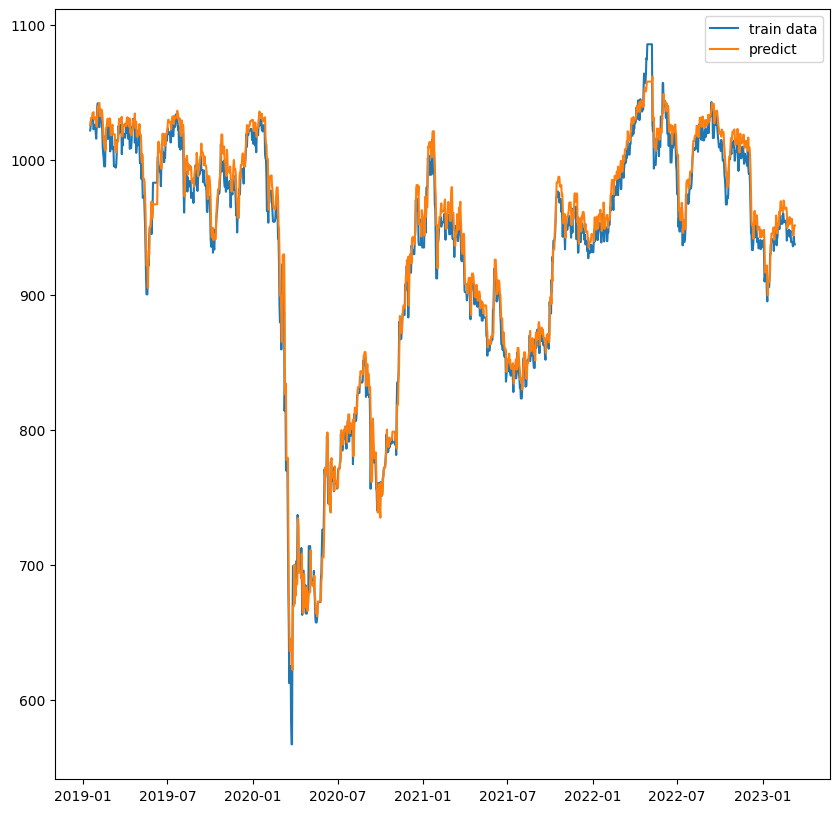

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_predictions = model.predict(X_train).flatten()
plt.figure(figsize=(10,10))
plt.plot(dates_train,y_train)
plt.plot(dates_train,train_predictions)
plt.legend(["train data","predict"])
print(mean_squared_error(y_train,train_predictions))
print(r2_score(y_train,train_predictions))
print(mean_absolute_error(y_train,train_predictions))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
121.46303459003553
0.14190019251820618
9.753094919305095


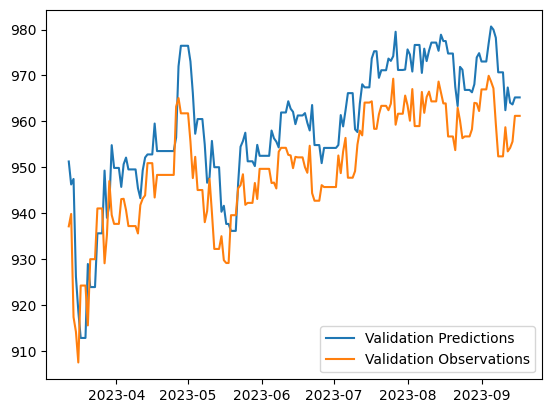

In [27]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
print(mean_squared_error(y_val,val_predictions))
print(r2_score(y_val,val_predictions))
print(mean_absolute_error(y_val,val_predictions))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
129.74510433668533
9.788960012335526
0.8768218963727678


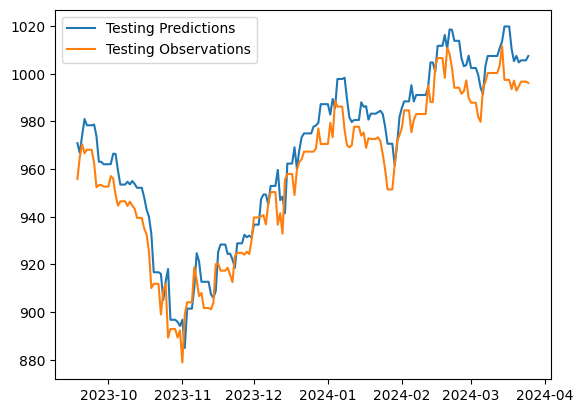

In [28]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
lstm_MSE =mean_squared_error(y_test,test_predictions)
lstm_r2 = r2_score(y_test,test_predictions)
lstm_MAE = mean_absolute_error(y_test,test_predictions)
print(lstm_MSE)
print(lstm_MAE)
print(lstm_r2)

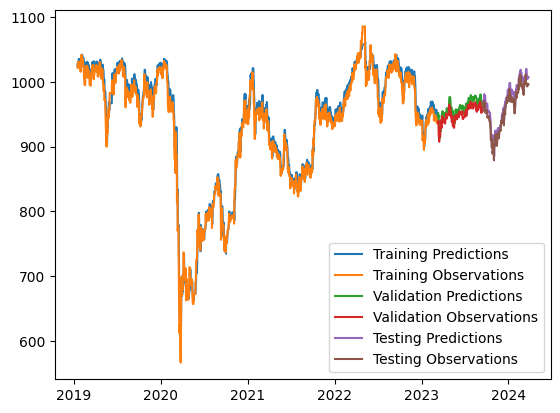

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [30]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train.iloc[-1].values)
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\untu0\AppData\Local\Temp\ipykernel_4776\1060107274.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_window[-1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

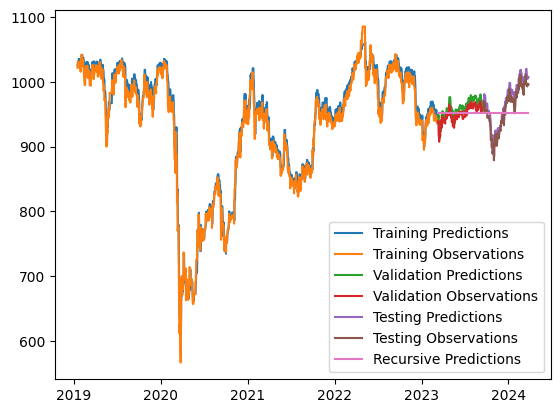

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

### forecasting using LSTM

In [32]:
temp = []
forecast_lstm = []
prediction_harga = []
date_forecast = pd.DataFrame(columns=["Date"])
n = data.shape[1]-1
n
X_forecast = pd.DataFrame()
for target in range(data.shape[1]-1,0,-1):
    X_forecast[f'Target-{target}'] = None
price_pred = pd.DataFrame(columns=["Price"])
date_forecast.loc[0] = dates.iloc[-1]
temp.append(data.iloc[-1].values)
for t in range(0,n):
    forecast_lstm.append(temp[0][t])

for i in range(1,30):
    X_forecast.loc[i-1] = forecast_lstm[-n:]
    lstm_pred = model.predict(X_forecast)
    # print(lstm_pred)
    forecast_lstm.append(lstm_pred[i-1][0])
    # print(forecast_lstm)
    price_pred.loc[i-1] = lstm_pred[i-1][0]
    next_date = date_forecast.iloc[0] + datetime.timedelta(days=i)
    date_forecast.loc[i] = next_date
date_forecast = date_forecast[:len(date_forecast)-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [33]:
X_forecast

,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1
0,996.560000,1000.350000,1003.480000,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000
1,1000.350000,1003.480000,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,1007.502991
2,1003.480000,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,1007.502991,1016.040283
3,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,1007.502991,1016.040283,1023.482788
4,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,1007.502991,1016.040283,1023.482788,1029.334961
5,993.600000,997.150000,992.930000,994.770000,996.740000,1007.502991,1016.040283,1023.482788,1029.334961,1033.666260
6,997.150000,992.930000,994.770000,996.740000,1007.502991,1016.040283,1023.482788,1029.334961,1033.666260,1036.720581
7,992.930000,994.770000,996.740000,1007.502991,1016.040283,1023.482788,1029.334961,1033.666260,1036.720581,1038.796143
8,994.770000,996.740000,1007.502991,1016.040283,1023.482788,1029.334961,1033.666260,1036.720581,1038.796143,1040.169434
9,996.740000,1007.502991,1016.040283,1023.482788,1029.334961,1033.666260,1036.720581,1038.796143,1040.169434,1041.061768


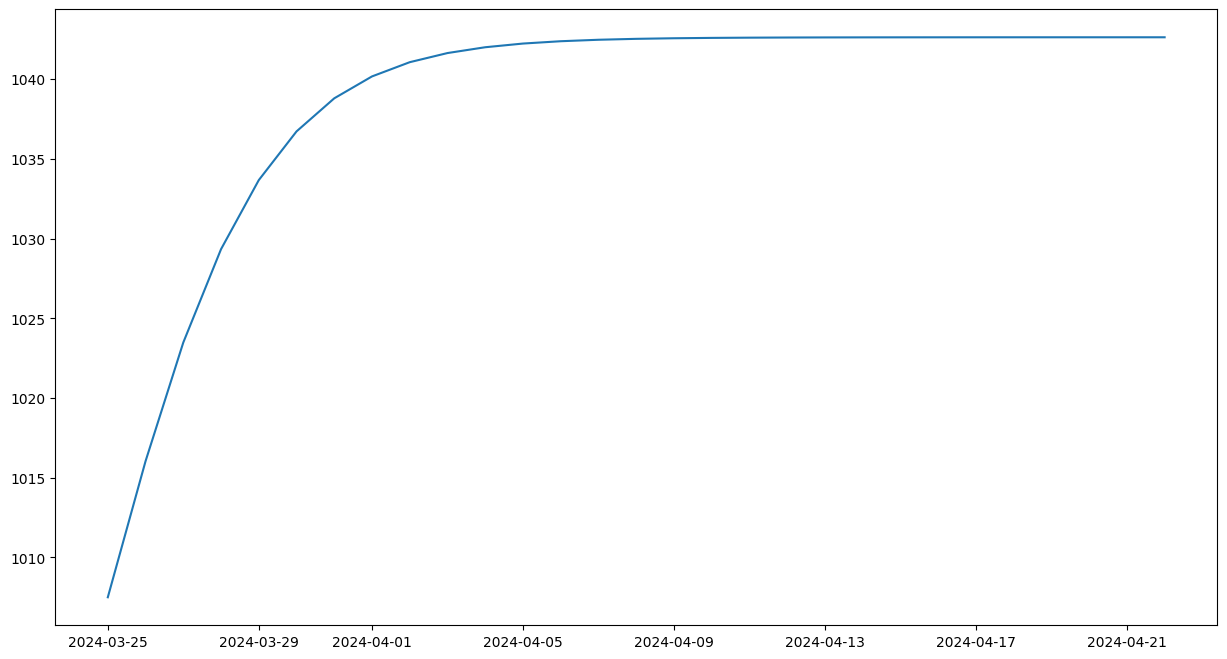

In [34]:
plt.figure(figsize=[15,8])
plt.plot(date_forecast,price_pred)

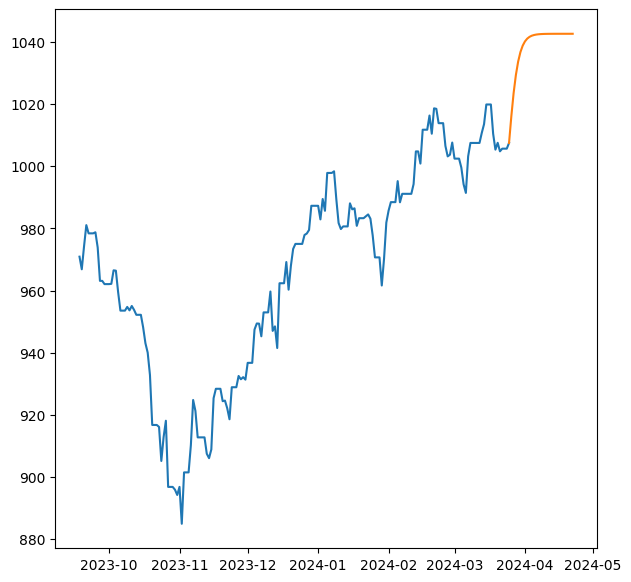

In [35]:
plt.figure(figsize=[7,7])
plt.plot(dates_test,test_predictions)
plt.plot(date_forecast,price_pred)

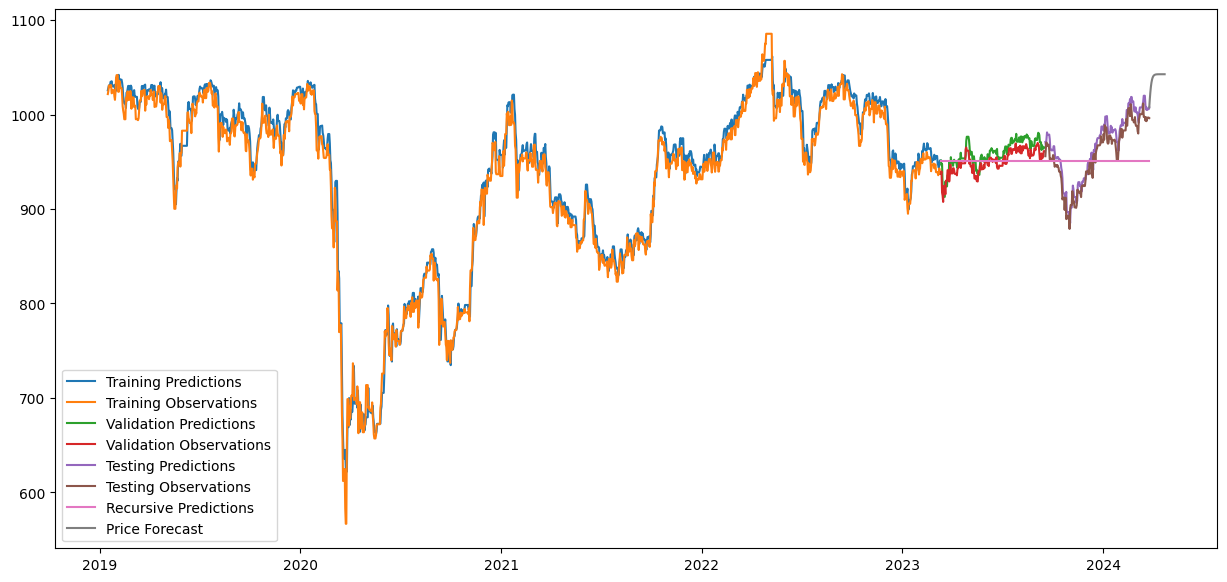

In [36]:
plt.figure(figsize=[15,7])
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.plot(date_forecast,price_pred)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions',"Price Forecast"])